In [3]:
import torch 

d_ = torch.load('/home/samuelboehm/EEG-GAN/datasets/clinical/S1.pt')
d_ = d_.datasets[0][0][0]
d_.shape

(21, 644)

In [1]:
from braindecode.datasets.base import BaseConcatDataset
from braindecode.preprocessing import preprocess, Preprocessor
import numpy as np

import mne
mne.set_log_level('ERROR')


def change_type(X: np.ndarray, out_type: str) -> np.ndarray:
    # MNE expects the data to be of type float64. This helper function changes the type of the input data to float64.
    if out_type == 'float64':
        return X.astype('float64')
    elif out_type == 'float32':
        return X.astype('float32')
    else:
        raise ValueError(f"Unknown type {out_type}")


<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
2024-04-19 16:34:02.773764: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-19 16:34:02.987825: E external/local_xla/

In [4]:
from mne.filter import resample

d_ = torch.Tensor(d_)

down = resample(d_, 8, 256)


TypeError: Data to be resampled must be an instance of ndarray, list, or tuple, got <class 'torch.Tensor'> instead.

In [119]:
import torch.nn as nn
label_embedding = nn.Embedding(2, 644)

y = torch.Tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1]).long()

emb = label_embedding(y).view(y.shape[0], 1, 644)

In [113]:
def resample(X:torch.Tensor, factor:int):
    """
    Downscale input. Using bicubic interpolation.

    Parameters
    ----------
    X : tensor
        Input data
    factor : int
        Factor to downscale the data
    Returns
    -------
    X : tensor
        Downsampled data
    """

    
    size = (X.shape[-2], int(X.shape[-1] // factor))

    print(size)
    print('x shape', X.shape)

    X = nn.functional.interpolate(X, size=size, mode='bicubic')

    return X

torch.Size([256, 3])


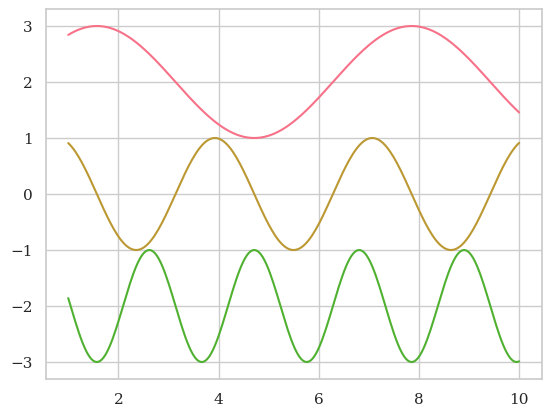

In [114]:
import matplotlib.pyplot as plt

x = torch.linspace(1, 10, 256)

y = torch.stack([torch.sin(x) + 2, torch.sin(2*x), torch.sin(3*x)-2], dim=1)
print(y.shape)

plt.plot(x, y)

In [115]:
y = y.T
y = y.unsqueeze(0).unsqueeze(0)


torch.Size([1, 1, 3, 256])
(3, 512)
x shape torch.Size([1, 1, 3, 256])


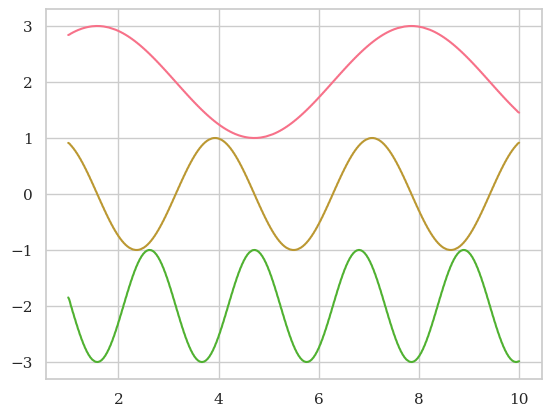

In [116]:


print(y.shape)

factor = .5
y_down = downsample(y, factor)
plt.plot(torch.linspace(1, 10, int(256//factor)), y_down[0, 0, :].T)

In [131]:
emb.shape


torch.Size([10, 1, 1, 644])

In [133]:
(emb.shape[-2], emb.shape[-1] // 2)

(1, 322)

In [127]:
emb_down = downsample(emb, 2)

(1, 322)
x shape torch.Size([10, 1, 1, 644])


In [128]:
emb_down.shape

torch.Size([10, 1, 1, 322])

In [1]:
from src.data.datamodule import ProgressiveGrowingDataset
import yaml

# read .yaml to dict
with open('/home/samuelboehm/EEG-GAN/configs/data/clinical.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

2024-04-23 17:30:04.765062: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 17:30:04.785943: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 17:30:04.785965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 17:30:04.786548: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-23 17:30:04.790324: I tensorflow/core/platform/cpu_feature_guar

In [2]:
ProgressiveGrowingDataset(**config, n_stages=5)

<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use doc

(21, 40)
